### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
import category_encoders as ce

### Reading CSV Files

In [2]:
df_1990_1999 = pd.read_csv('ResaleFlatPricesBasedonApprovalDate19901999.csv')

In [3]:
df_2000_2012 = pd.read_csv('ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv')

In [4]:
df_2012_2014 = pd.read_csv('ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv')

In [5]:
df_2015_2016 = pd.read_csv('ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv')

In [6]:
df_2017_onwards = pd.read_csv('ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv')

In [7]:
df_1990_1999.shape

(287196, 10)

In [8]:
df_2000_2012.shape

(369651, 10)

In [9]:
df_2012_2014.shape

(52203, 10)

In [10]:
df_2015_2016.shape

(37153, 11)

In [11]:
df_2017_onwards.shape

(174038, 11)

In [12]:
df_1990_1999.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price'],
      dtype='object')

In [13]:
df_2000_2012.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price'],
      dtype='object')

In [14]:
df_2012_2014.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price'],
      dtype='object')

In [15]:
df_2015_2016.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')

In [16]:
df_2017_onwards.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')

#### Merging CSV Files

In [17]:
df = pd.concat([df_1990_1999,df_2000_2012,df_2012_2014,df_2015_2016,df_2017_onwards], ignore_index=True)

In [18]:
df.shape

(920241, 11)

In [19]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


### Handling Null Values

In [20]:
df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [21]:
df.dropna(axis = 1, inplace = True)

In [22]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0


## Feature Engineering

### Month column

In [23]:
df['year'] = df['month'].map(lambda x: x[:4])

In [24]:
df['month'] = df['month'].map(lambda x: x[5:])

In [25]:
cols_to_convert = ['month','year']
for col in cols_to_convert:
    df[col] = df[col].astype(int)

### Town column

In [26]:
df['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [27]:
len(df['town'].unique())

27

### Flat Type column

In [28]:
df['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [29]:
df.loc[df['flat_type'] == 'MULTI-GENERATION', 'flat_type'] = df['flat_type'].map(lambda x: 'MULTI GENERATION')

### Block column

In [30]:
df['block'].unique()

array(['309', '216', '211', ..., '438C', '606C', '605D'], dtype=object)

In [31]:
len(df['block'].unique())

2706

### Street Name column

In [32]:
df['street_name'].unique()

array(['ANG MO KIO AVE 1', 'ANG MO KIO AVE 3', 'ANG MO KIO AVE 4',
       'ANG MO KIO AVE 10', 'ANG MO KIO AVE 5', 'ANG MO KIO AVE 8',
       'ANG MO KIO AVE 6', 'ANG MO KIO AVE 9', 'ANG MO KIO AVE 2',
       'BEDOK RESERVOIR RD', 'BEDOK NTH ST 3', 'BEDOK STH RD',
       'NEW UPP CHANGI RD', 'BEDOK NTH RD', 'BEDOK STH AVE 1',
       'CHAI CHEE RD', 'CHAI CHEE DR', 'BEDOK NTH AVE 4',
       'BEDOK STH AVE 3', 'BEDOK STH AVE 2', 'BEDOK NTH ST 2',
       'BEDOK NTH ST 4', 'BEDOK NTH AVE 2', 'BEDOK NTH AVE 3',
       'BEDOK NTH AVE 1', 'BEDOK NTH ST 1', 'CHAI CHEE ST', 'SIN MING RD',
       'SHUNFU RD', 'BT BATOK ST 11', 'BT BATOK WEST AVE 8',
       'BT BATOK WEST AVE 6', 'BT BATOK ST 21', 'BT BATOK EAST AVE 5',
       'BT BATOK EAST AVE 4', 'HILLVIEW AVE', 'BT BATOK CTRL',
       'BT BATOK ST 31', 'BT BATOK EAST AVE 3', 'TAMAN HO SWEE',
       'TELOK BLANGAH CRES', 'BEO CRES', 'TELOK BLANGAH DR', 'DEPOT RD',
       'TELOK BLANGAH RISE', 'JLN BT MERAH', 'HENDERSON RD', 'INDUS RD',
       

In [33]:
len(df['street_name'].unique())

584

### Storey Range column

In [34]:
df['storey_range'].unique()

array(['10 TO 12', '04 TO 06', '07 TO 09', '01 TO 03', '13 TO 15',
       '19 TO 21', '16 TO 18', '25 TO 27', '22 TO 24', '28 TO 30',
       '31 TO 33', '40 TO 42', '37 TO 39', '34 TO 36', '06 TO 10',
       '01 TO 05', '11 TO 15', '16 TO 20', '21 TO 25', '26 TO 30',
       '36 TO 40', '31 TO 35', '46 TO 48', '43 TO 45', '49 TO 51'],
      dtype=object)

In [35]:
df['start_storey_range'] = df['storey_range'].map(lambda x: x[:2]).astype(int)

In [36]:
df['end_storey_range'] = df['storey_range'].map(lambda x: x[6:]).astype(int)

In [37]:
df['total_storeys'] = df['end_storey_range'] - df['start_storey_range']

### Floor Area column

In [38]:
df['floor_area_sqm'].value_counts()

floor_area_sqm
67.0     68938
104.0    46951
68.0     39658
84.0     35972
92.0     30080
         ...  
75.9         1
69.2         1
152.4        1
131.1        1
208.0        1
Name: count, Length: 211, dtype: int64

### Flat Model column

In [39]:
df['flat_model'].unique()

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
       'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
       'Maisonette', 'Multi Generation', 'Adjoined flat',
       'Premium Apartment', 'Terrace', 'Improved-Maisonette',
       'Premium Maisonette', '2-room', 'Model A2', 'DBSS', 'Type S1',
       'Type S2', 'Premium Apartment Loft', '3Gen'], dtype=object)

In [40]:
standard_mapping = {
    '2-ROOM': '2-Room',
    '2-room': '2-Room',
    'APARTMENT': 'Apartment',
    'Adjoined flat': 'Adjoined Flat',
    'DBSS': 'DBSS',
    'IMPROVED': 'Improved',
    'IMPROVED-MAISONETTE': 'Improved-Maisonette',
    'MAISONETTE': 'Maisonette',
    'MODEL A': 'Model A',
    'MODEL A-MAISONETTE': 'Model A-Maisonette',
    'Multi Generation': 'MULTI GENERATION',
    'NEW GENERATION': 'New Generation',
    'PREMIUM APARTMENT': 'Premium Apartment',
    'SIMPLIFIED': 'Simplified',
    'STANDARD': 'Standard',
    'TERRACE': 'Terrace'
}

df['flat_model'] = df['flat_model'].replace(standard_mapping)

### Lease Commence Date column

In [41]:
df['lease_commence_date'].unique()

array([1977, 1976, 1978, 1979, 1984, 1980, 1985, 1981, 1982, 1986, 1972,
       1983, 1973, 1969, 1975, 1971, 1974, 1967, 1970, 1968, 1988, 1987,
       1989, 1990, 1992, 1993, 1994, 1991, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 1966, 2002, 2006, 2003, 2005, 2004, 2008, 2007, 2009,
       2010, 2012, 2011, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2022,
       2020], dtype=int64)

### Resale Price column

In [42]:
df['resale_price'].value_counts()

resale_price
300000.0     6902
350000.0     6803
280000.0     6543
320000.0     6505
250000.0     6283
             ... 
102080.0        1
143450.0        1
269001.0        1
400998.0        1
1056500.0       1
Name: count, Length: 9415, dtype: int64

## EDA

In [43]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,start_storey_range,end_storey_range,total_storeys
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,9000.0,1990,10,12,2
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,Improved,1977,6000.0,1990,4,6,2
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,8000.0,1990,10,12,2
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,Improved,1977,6000.0,1990,7,9,2
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1976,47200.0,1990,4,6,2


In [44]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'year', 'start_storey_range', 'end_storey_range', 'total_storeys'],
      dtype='object')

In [45]:
df.shape

(920241, 14)

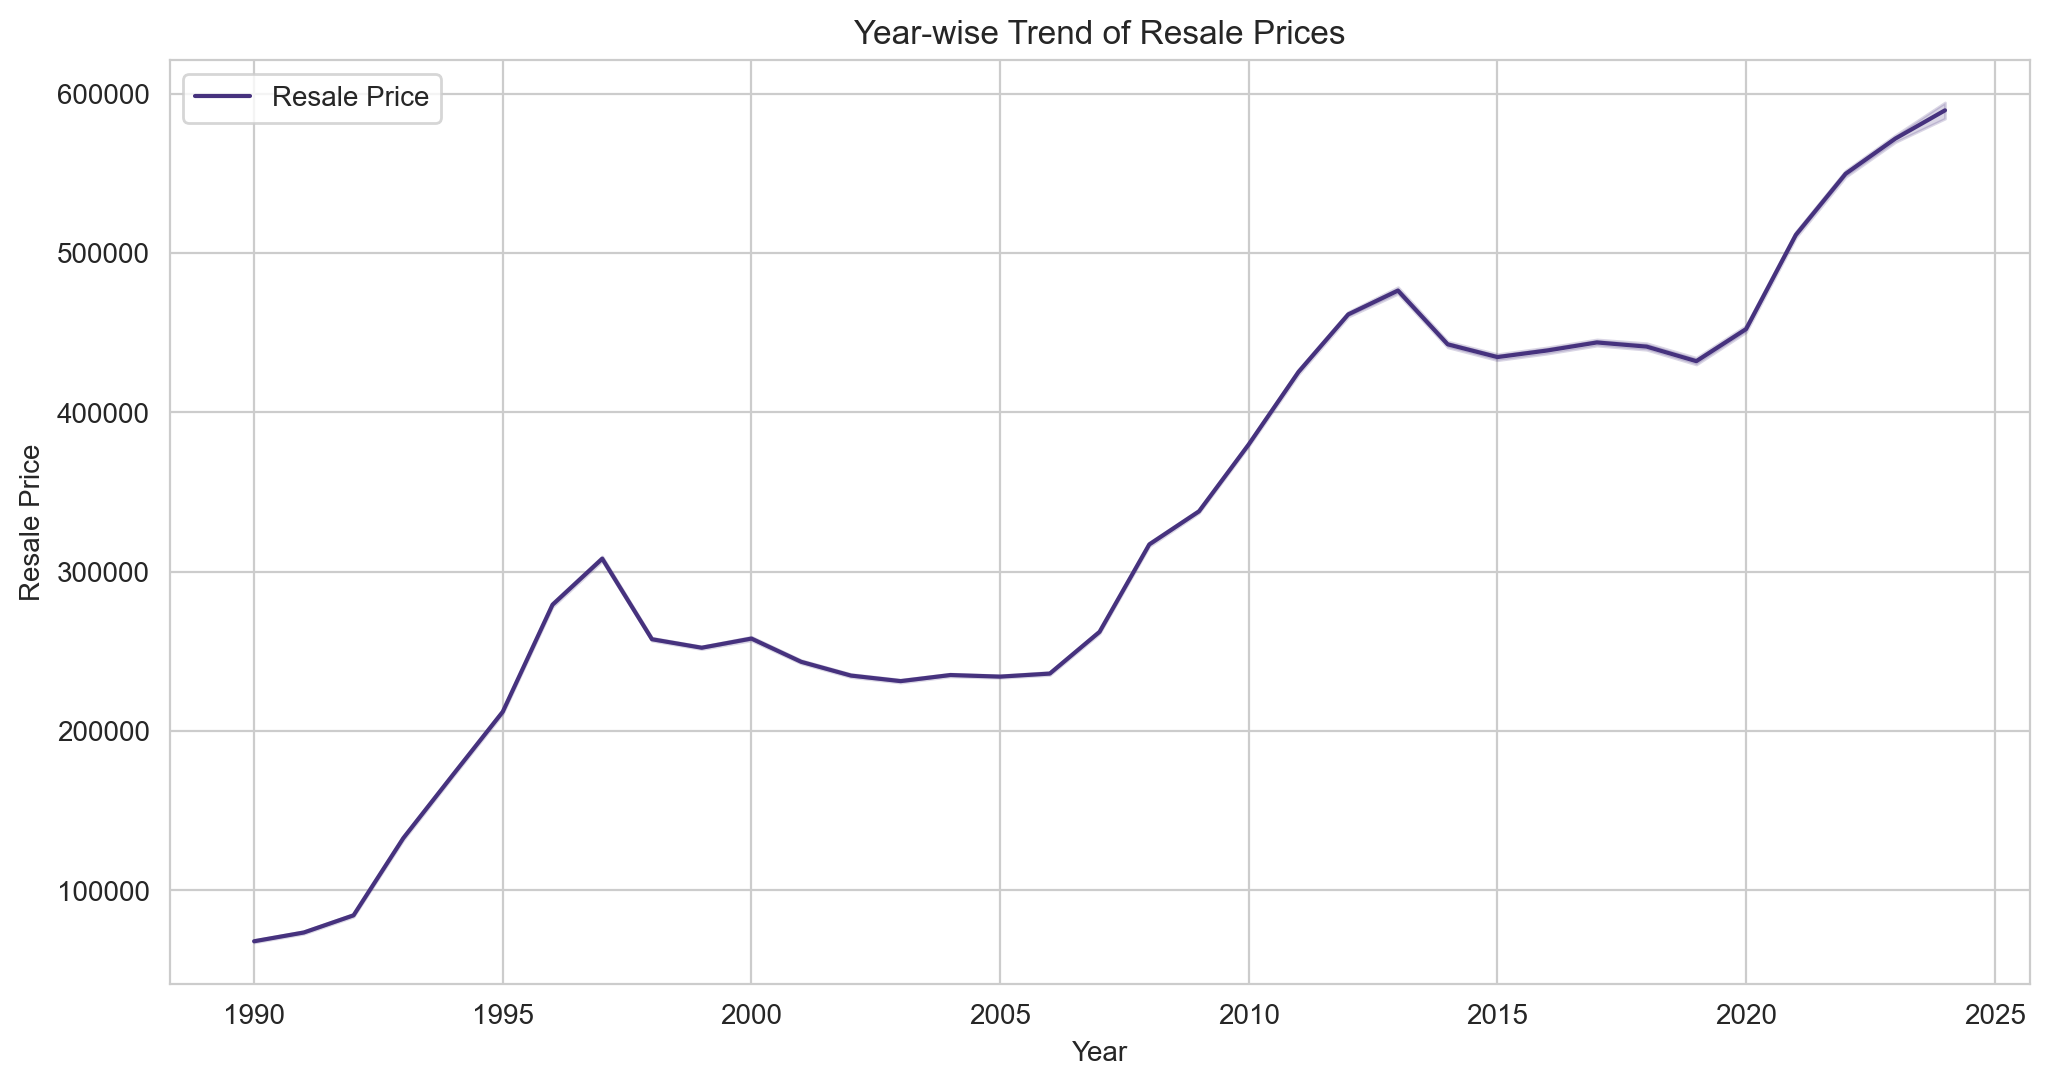

In [46]:
plt.figure(figsize=(12, 6), dpi=200)
sns.set_style("whitegrid")
sns.set_palette("viridis")
sns.lineplot(data=df, x='year', y='resale_price', label='Resale Price')
plt.title('Year-wise Trend of Resale Prices')
plt.xlabel('Year')
plt.ylabel('Resale Price')
plt.legend()
plt.show()

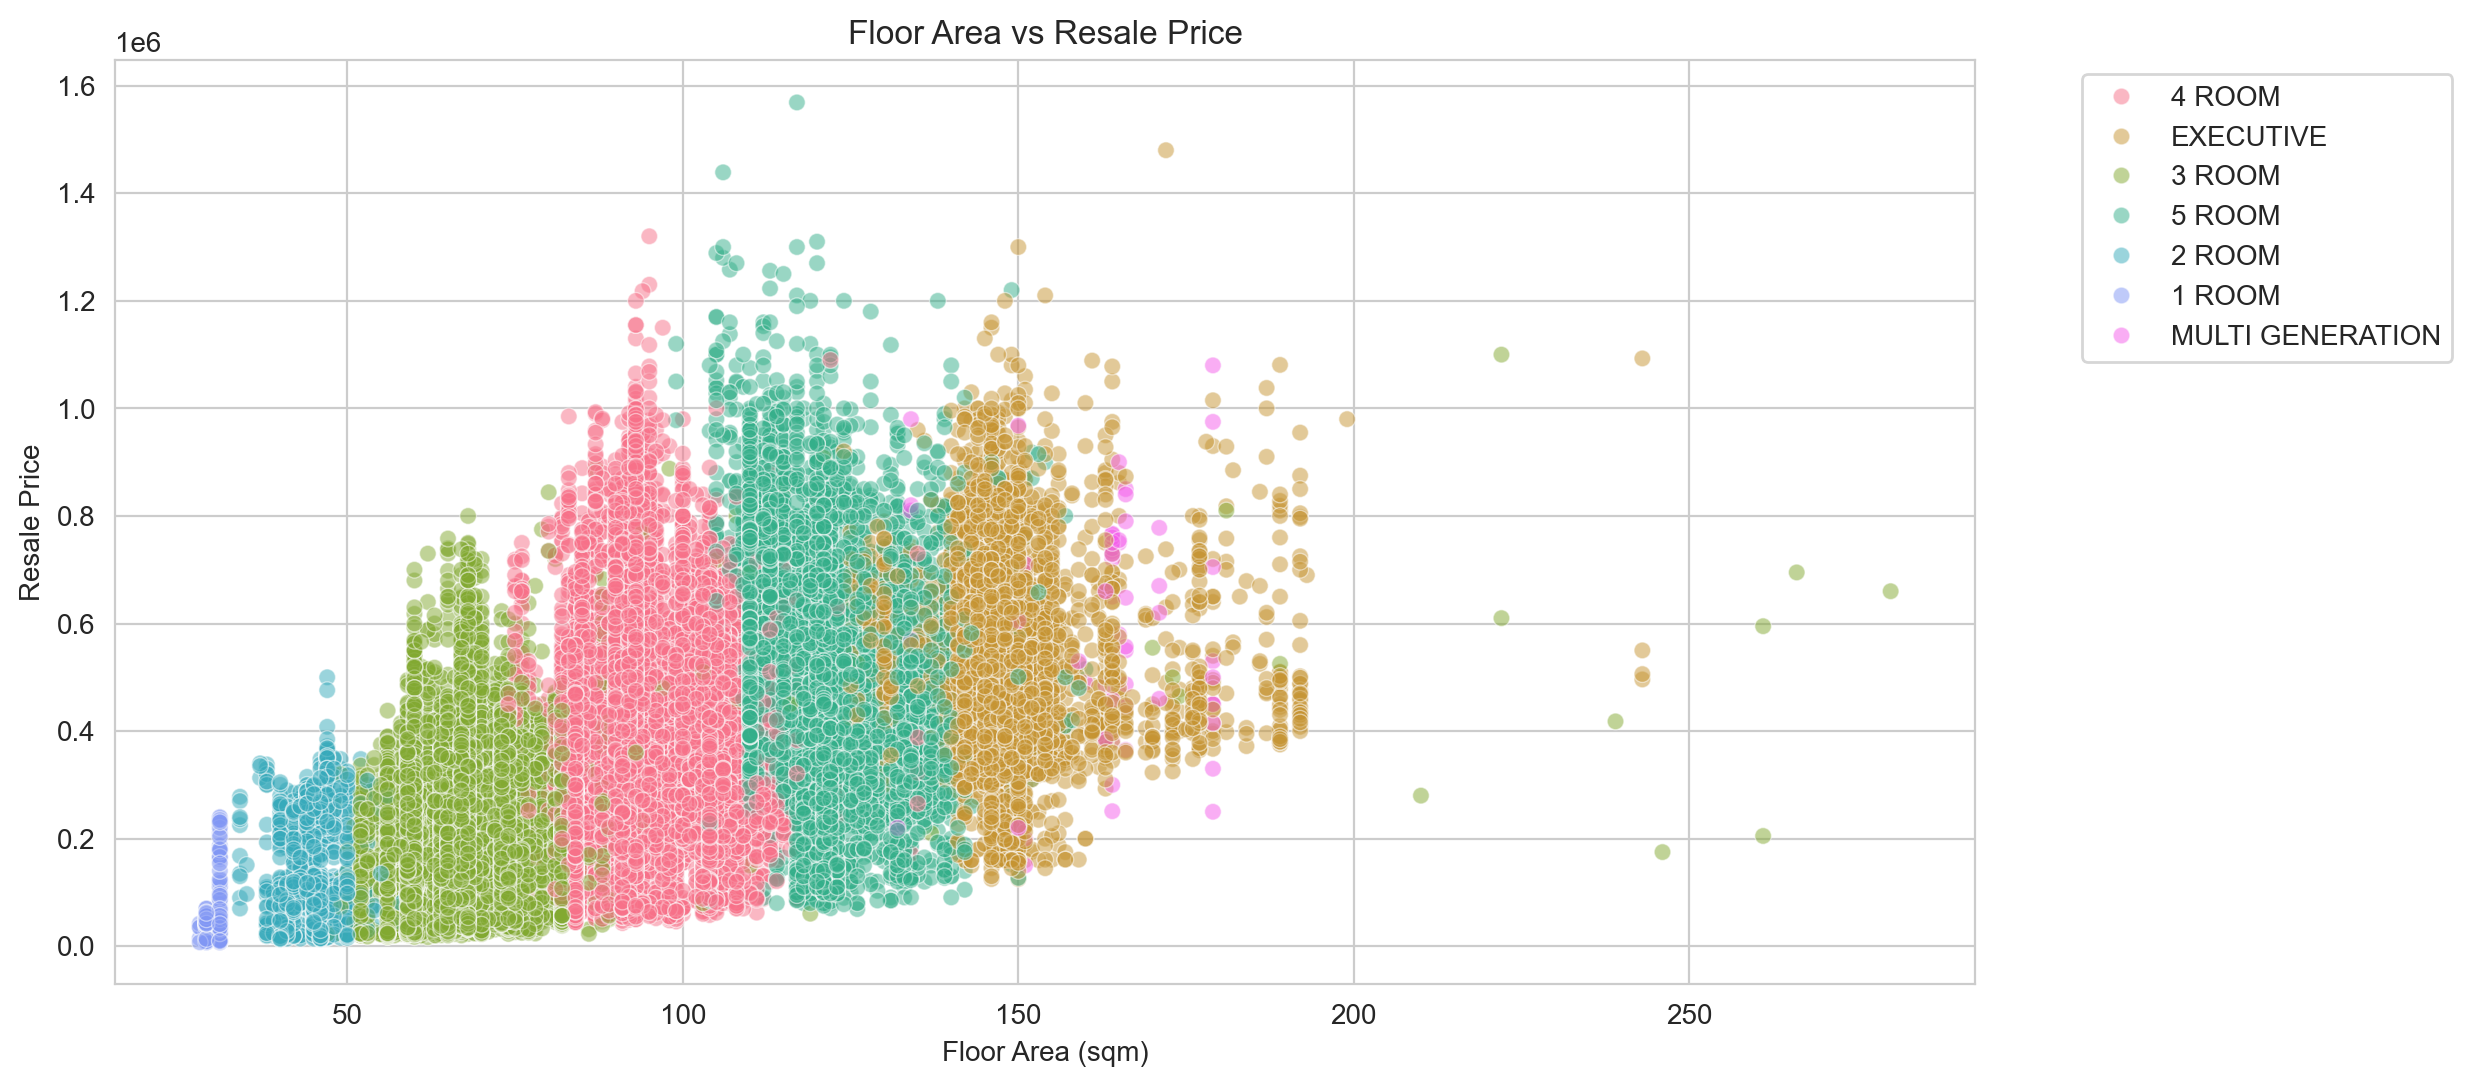

In [47]:
plt.figure(figsize=(12, 6), dpi=200)
sns.scatterplot(data=df.sample(frac=0.1), x='floor_area_sqm', y='resale_price', 
                hue='flat_type', alpha=0.5)
plt.title('Floor Area vs Resale Price')
plt.xlabel('Floor Area (sqm)')
plt.ylabel('Resale Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

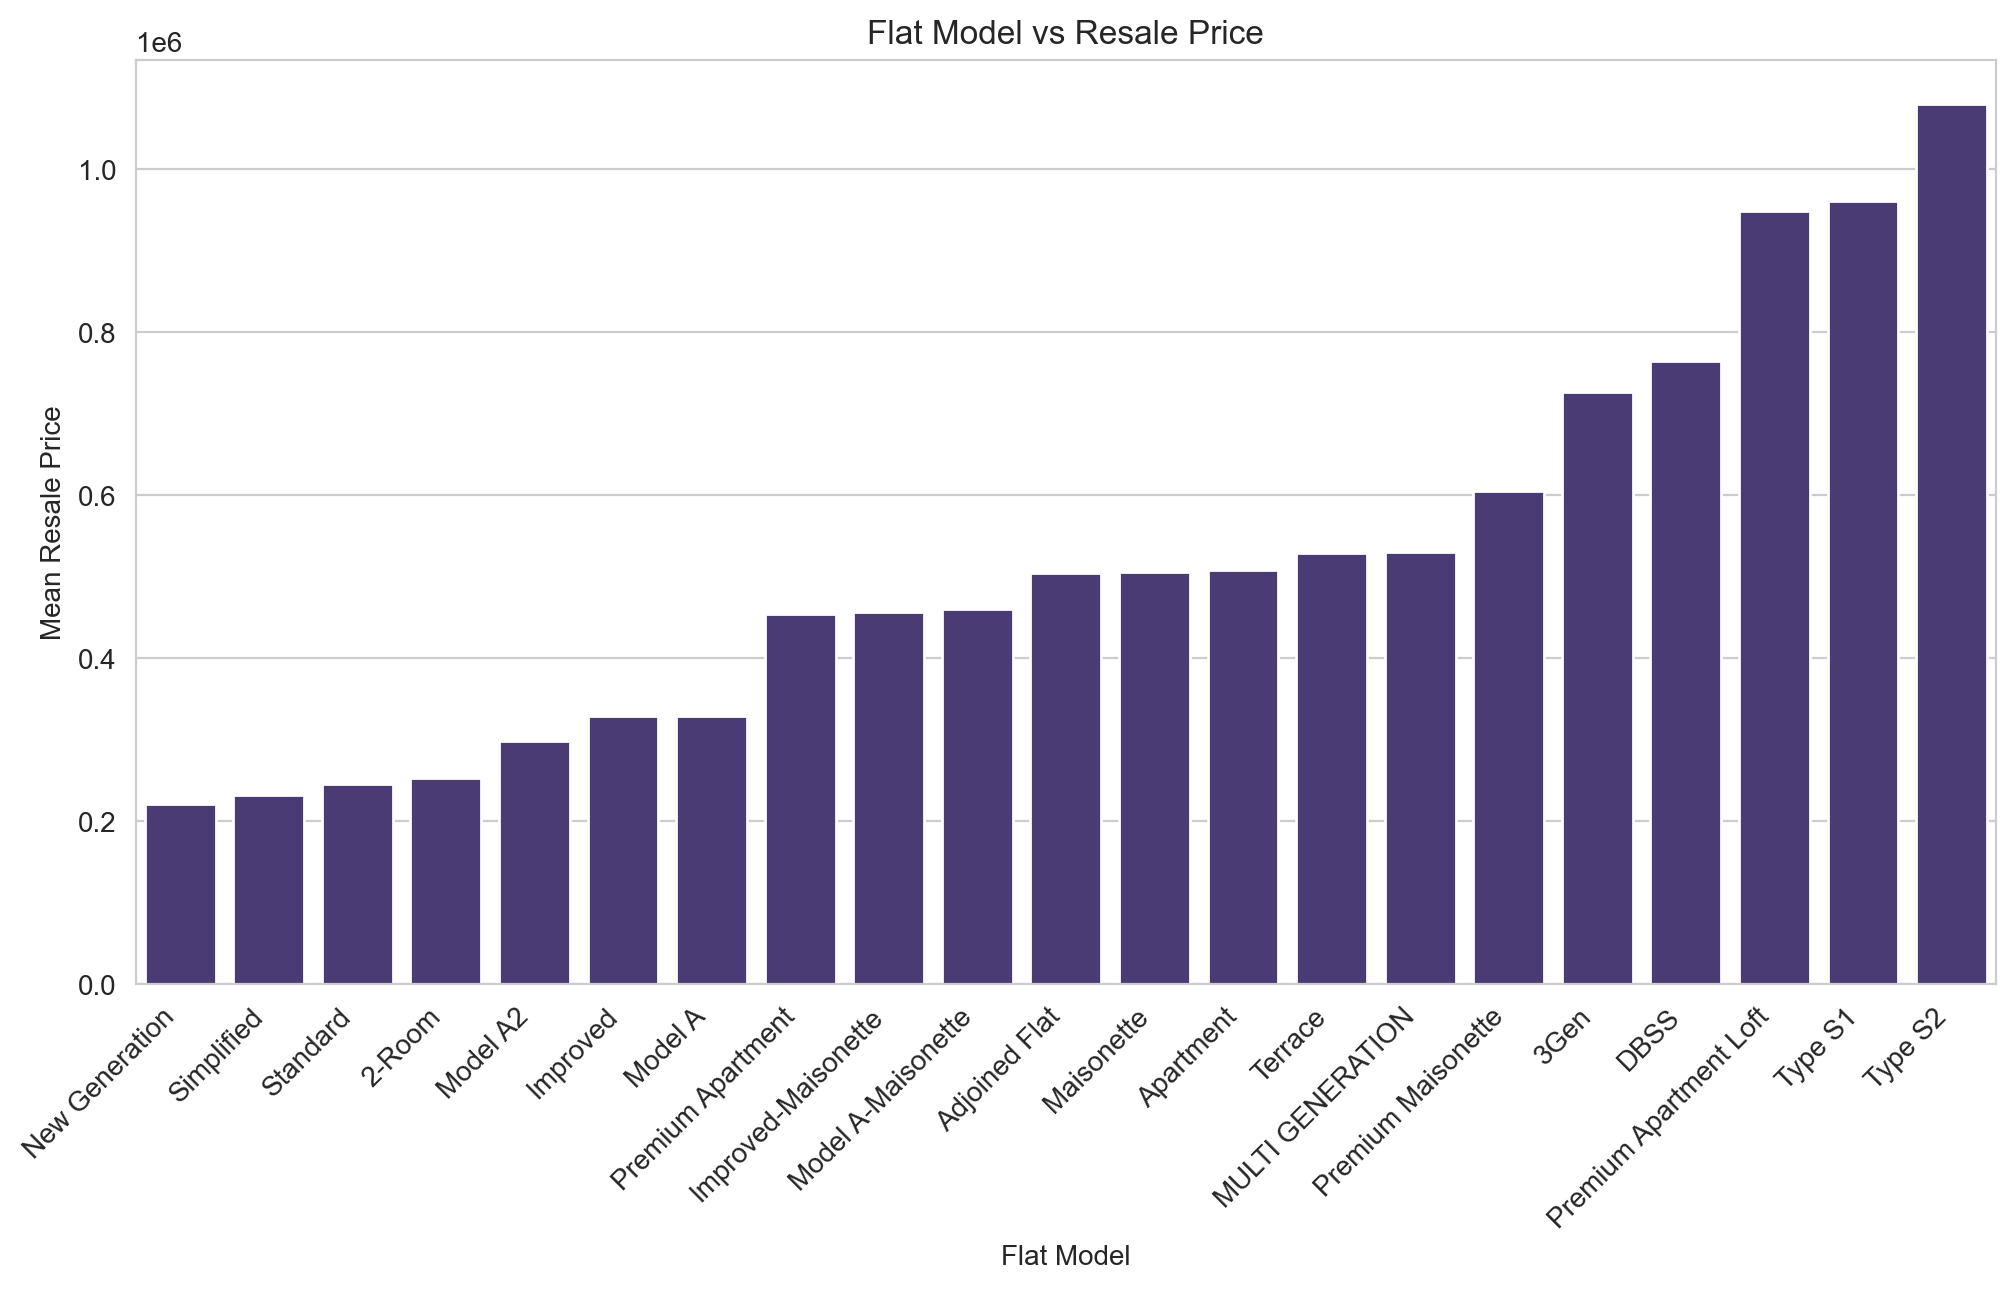

In [48]:
df_order = df.groupby('flat_model')['resale_price'].mean().sort_values().reset_index()

plt.figure(figsize=(12, 6), dpi=200)
ax = sns.barplot(data=df_order, x='flat_model', y='resale_price')
plt.title('Flat Model vs Resale Price')
plt.xlabel('Flat Model')
plt.ylabel('Mean Resale Price')
plt.xticks(rotation=45, ha='right')
plt.show()

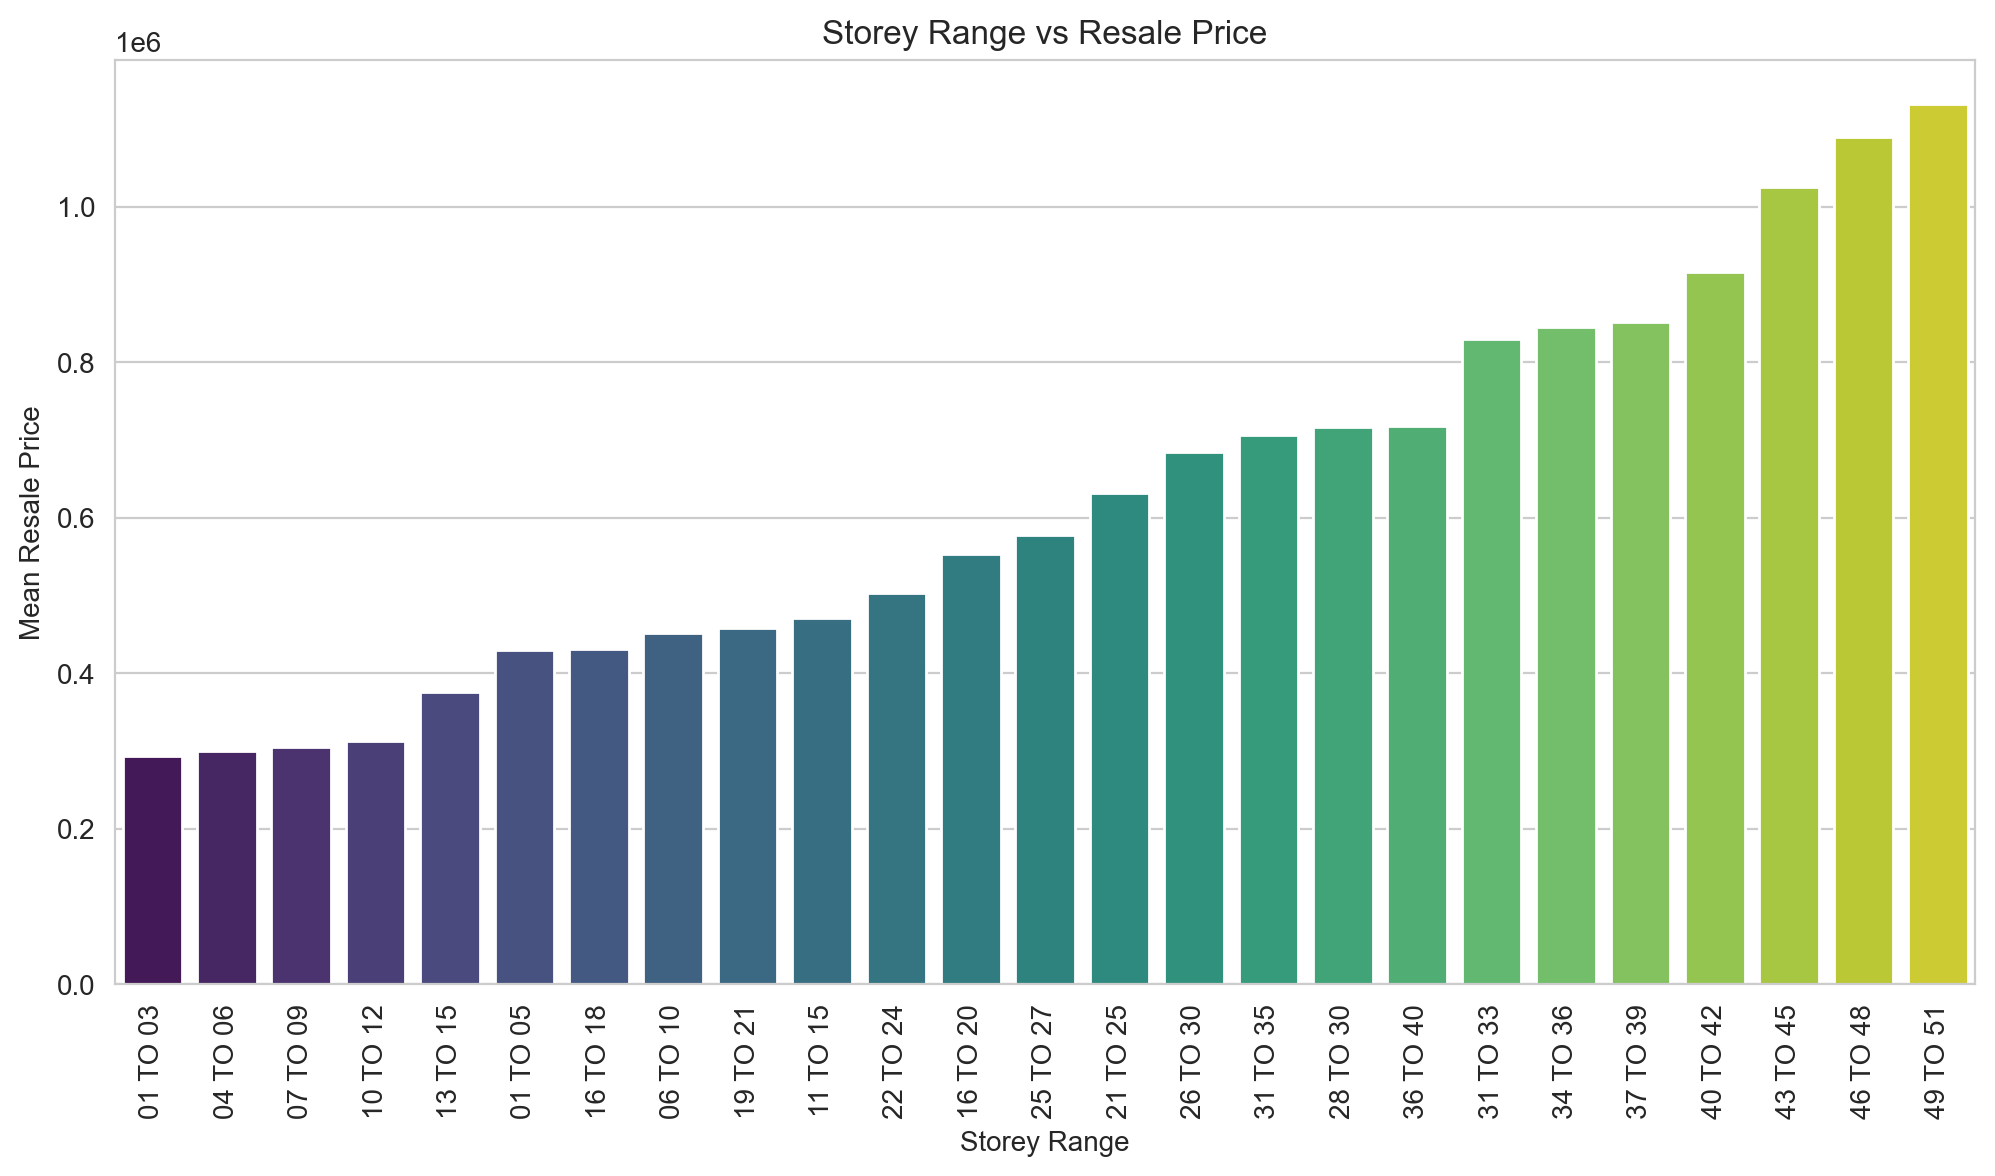

In [49]:
df_order = df.groupby('storey_range')['resale_price'].mean().sort_values().reset_index()

plt.figure(figsize=(12, 6), dpi=200)
sns.barplot(data=df_order, x='storey_range', y='resale_price', palette='viridis',
           hue = 'storey_range')
plt.title('Storey Range vs Resale Price')
plt.xlabel('Storey Range')
plt.ylabel('Mean Resale Price')
plt.xticks(rotation=90)
plt.show()

### Outlier Detection

In [50]:
cols_to_check = ['floor_area_sqm', 'lease_commence_date', 'resale_price',
           'start_storey_range', 'end_storey_range', 'total_storeys']

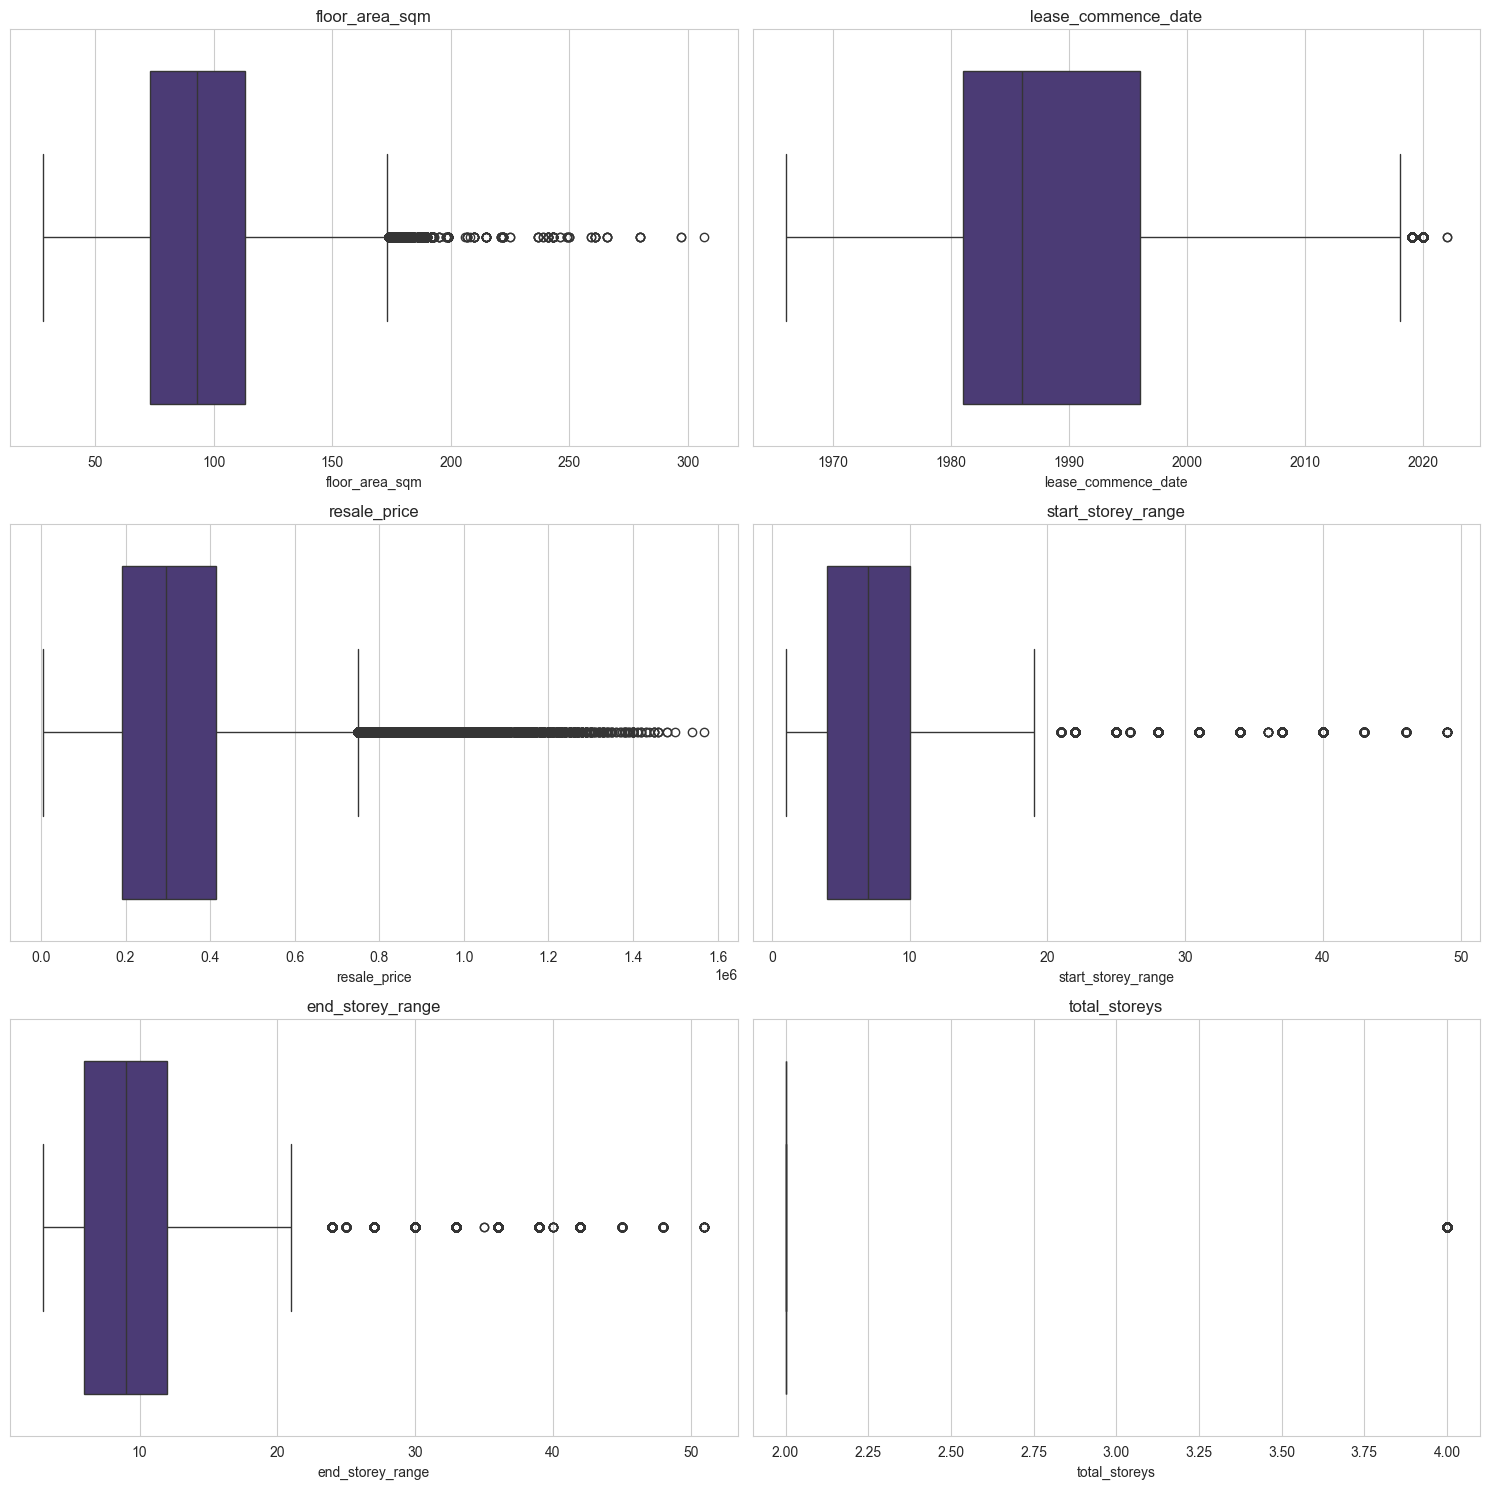

In [51]:
fig, axes = plt.subplots(3,2, figsize=(15,15))
axes = axes.flatten()
for i, col in enumerate(cols_to_check):
    sns.boxplot(data = df, x = col, ax = axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show();

In [52]:
df['total_storeys'].value_counts()

total_storeys
2    913403
4      6838
Name: count, dtype: int64

In [53]:
df['lease_commence_date'].unique()

array([1977, 1976, 1978, 1979, 1984, 1980, 1985, 1981, 1982, 1986, 1972,
       1983, 1973, 1969, 1975, 1971, 1974, 1967, 1970, 1968, 1988, 1987,
       1989, 1990, 1992, 1993, 1994, 1991, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 1966, 2002, 2006, 2003, 2005, 2004, 2008, 2007, 2009,
       2010, 2012, 2011, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2022,
       2020], dtype=int64)

In [54]:
df['resale_price'].value_counts()

resale_price
300000.0     6902
350000.0     6803
280000.0     6543
320000.0     6505
250000.0     6283
             ... 
102080.0        1
143450.0        1
269001.0        1
400998.0        1
1056500.0       1
Name: count, Length: 9415, dtype: int64

### Encoding

In [55]:
df = pd.get_dummies(df, columns = ['town'])

In [56]:
label_encoder = LabelEncoder()
df['flat_type'] = label_encoder.fit_transform(df['flat_type'])

In [57]:
encoder = ce.BinaryEncoder(cols = ['block'])
df = encoder.fit_transform(df)

In [58]:
encoder = ce.BinaryEncoder(cols = ['street_name'])
df = encoder.fit_transform(df)

In [59]:
df['flat_model'] = label_encoder.fit_transform(df['flat_model'])

In [60]:
df.drop('storey_range',axis = 1, inplace = True)

### Feature Selection

In [61]:
for col in df.columns:
    df[col] = df[col].astype(float)

In [62]:
df.corr()['resale_price'].sort_values(ascending = False)[1:]

year                    0.670153
flat_type               0.593111
floor_area_sqm          0.567297
lease_commence_date     0.536222
block_1                 0.265677
street_name_0           0.249314
end_storey_range        0.249059
start_storey_range      0.246567
street_name_1           0.244837
block_0                 0.228756
town_PUNGGOL            0.144970
town_SENGKANG           0.132276
block_2                 0.112285
town_PASIR RIS          0.098428
town_BISHAN             0.093387
total_storeys           0.069851
street_name_3           0.052975
town_SEMBAWANG          0.046592
town_BUKIT TIMAH        0.041455
block_3                 0.040328
town_BUKIT MERAH        0.038909
street_name_4           0.033661
town_CHOA CHU KANG      0.033516
town_TAMPINES           0.028408
street_name_5           0.022990
street_name_6           0.022055
block_4                 0.019315
block_9                 0.018982
town_BUKIT PANJANG      0.013888
month                   0.013123
town_CENTR

In [63]:
df_corr = pd.DataFrame(df.corr()['resale_price'].sort_values(ascending = False)[1:])

In [64]:
df_corr = df_corr.reset_index()

In [65]:
cols_to_remove = df_corr[(df_corr['resale_price'] <= 0.1) & (df_corr['resale_price'] >= -0.1)]['index'].tolist()

In [66]:
df = df.drop(columns = cols_to_remove)

<Axes: >

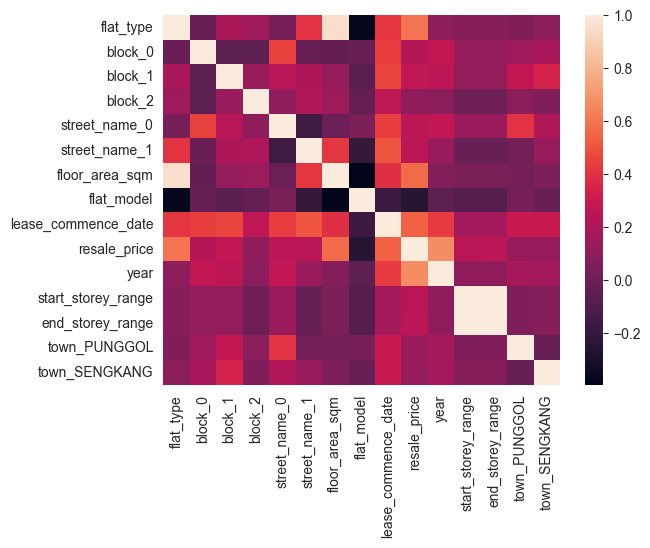

In [67]:
sns.heatmap(df.corr())

In [68]:
df.head()

,flat_type,block_0,block_1,block_2,street_name_0,street_name_1,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,start_storey_range,end_storey_range,town_PUNGGOL,town_SENGKANG
0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,5.0,1977.0,9000.0,1990.0,10.0,12.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,31.0,5.0,1977.0,6000.0,1990.0,4.0,6.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,31.0,5.0,1977.0,8000.0,1990.0,10.0,12.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,31.0,5.0,1977.0,6000.0,1990.0,7.0,9.0,0.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,73.0,12.0,1976.0,47200.0,1990.0,4.0,6.0,0.0,0.0


In [69]:
df.shape

(920241, 15)

### Saving CSV File

In [70]:
df.to_csv('Singapore_Flat_Cleaned.csv',index = False)